<img src="2.png" />

<center>
    <h2>Лабораторна №3</h2>
    <br>
    <h3>Тема роботи: «Побудова фракталів з використанням ітерованих
функцій».
        <br>
    Мета роботи: опанувати принципи побудови фрактальних об’єктів з
використанням систем ітерованих функцій, розробити відповідне програмне
забезпечення, навчитись будувати власні системи ітерованих функцій для
побудови фрактальних об’єктів.  </h3>
    <h4>Варіант №6</h4>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# Фрактальні системи
fractals = [

    {
        "name": "1.Хрестоподібний фрактал",
        "axiom": "F+XF+F+XF",
        "rules": {"X": "XF-F+F-XF+F+XF-F+F-X"},
        "angle": 90,
        "iterations": 3
    },

    {
        "name": "2.Кристалоподібний фрактал",
        "axiom": "F+F+F+F",
        "rules": {"F": "FF+F++F+F"},
        "angle": 90,
        "iterations": 3
    },

    {
        "name": "3.Фрактальна крива Пеано",
        "axiom": "X",
        "rules": {"X": "XFYFX+F+YFXFY-F-XFYFX",
                  "Y": "YFXFY-F-XFYFX+F+YFXFY"
                  },
        "angle": 90,
        "iterations": 2
    },

    {
        "name": "4.Квадратна сніжинка",
        "axiom": "F",
        "rules": {"F": "F-F+F+F-F"},
        "angle": 90,
        "iterations": 3
    },

    {
        "name": "5.Закрита квадратна сніжинка",
        "axiom": "FF+FF+FF+FF",
        "rules": {"F": "F+F-F-F+F"},
        "angle": 90,
        "iterations": 4
    },

    {
        "name": "6.Фрактальна зірочка",
        "axiom": "X+X+X+X+X+X+X+X",
        "rules": {"X": "X+YF++YF-FX--FXFX-YF+X", "Y": "-FX+YFYF++YF+FX--FX-YF"},
        "angle": 45,
        "iterations": 5
    },

    {
        "name": "7.Фрактальний басейн",
        "axiom": "-D--D",
        "rules": {
                "A": "F++FFFF--F--FFFF++F++FFFF--F",
                "B": "F--FFFF++F++FFFF--F--FFFF++F",
                "C": "BFA--BFA",
                "D": "CFC--CFC"
                },
        "angle": 45,
        "iterations": 3
    },

    {
        "name": "8.П'ятикутна фрактальна сніжинка",
        "axiom": "F++F++F++F++F",
        "rules": {"F": "F++F++F+++++F-F++F"},
        "angle": 36,
        "iterations": 4
    }
]

# Функція для генерації L-системи
def generate_l_system(axiom, rules, iterations):
    for _ in range(iterations):
        next_axiom = "".join([rules.get(symbol, symbol) for symbol in axiom])
        axiom = next_axiom
    return axiom

In [3]:

# Функція для малювання L-системи
def draw_l_s(commands, length, angle):
    angle = np.deg2rad(angle)
    x, y = 0, 0
    direction = 0  # Початковий напрямок вправо |-np.pi / 2 напрямок вниз для Фрактальна крива Пеано

    positions = [(x, y)]

    stack = []
    for command in commands:
        if command == "F":
            x += length * np.cos(direction)
            y += length * np.sin(direction)
            positions.append((x, y))
        elif command == "+":
            direction += angle
        elif command == "-":
            direction -= angle
        elif command == "[":
            stack.append((x, y, direction))
        elif command == "]":
            x, y, direction = stack.pop()
            positions.append((x, y))

    return positions


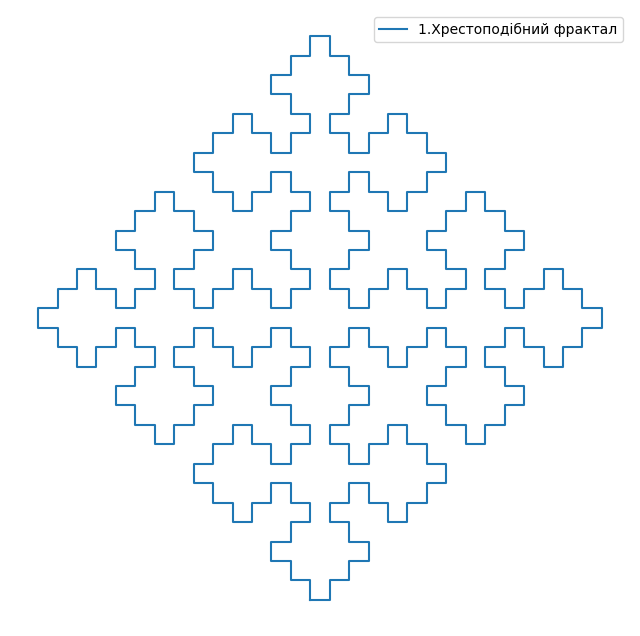

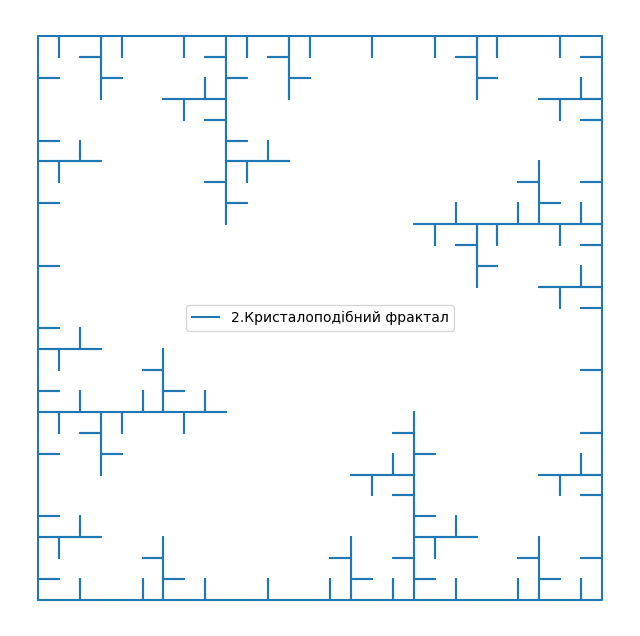

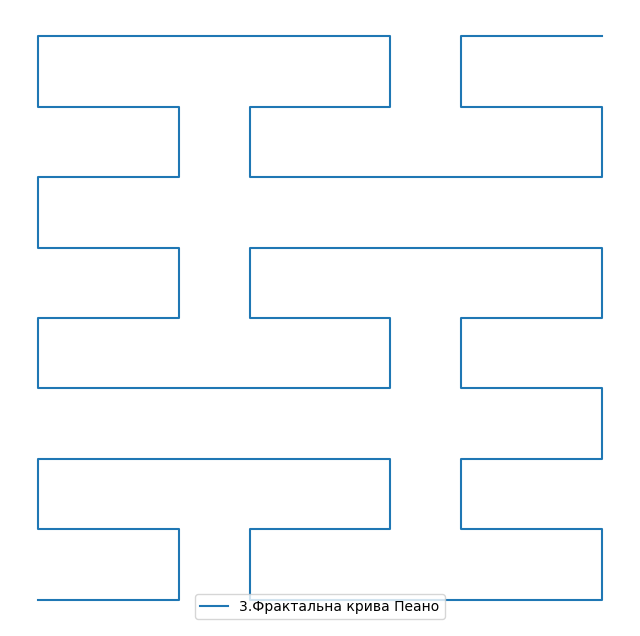

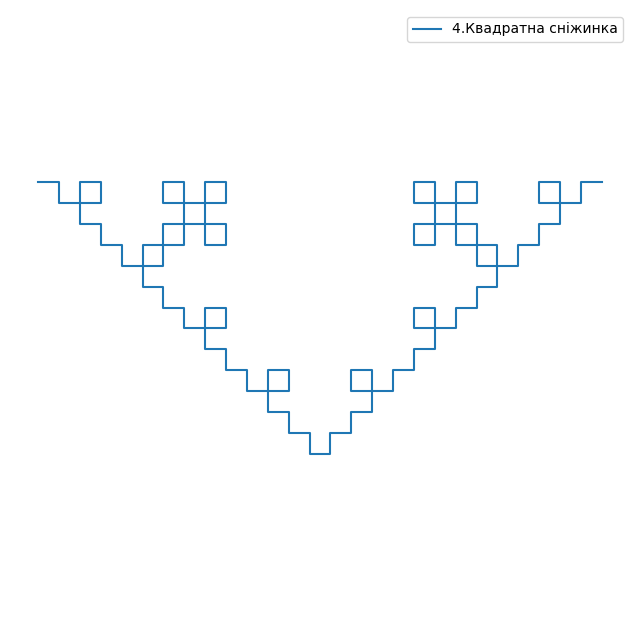

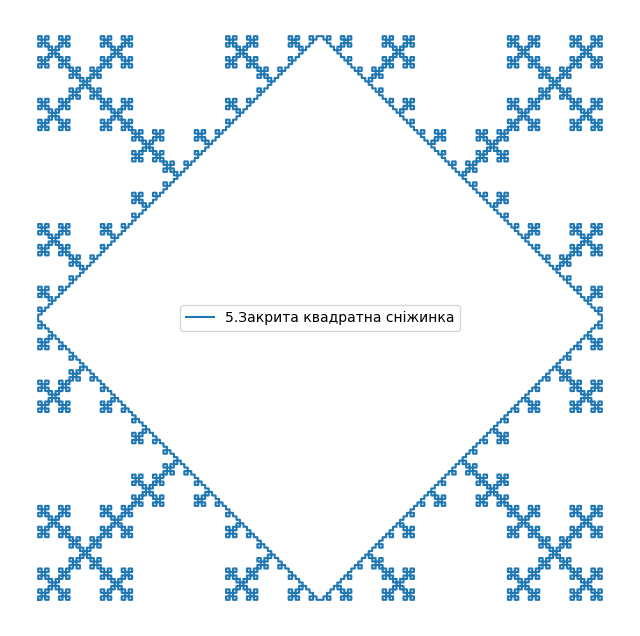

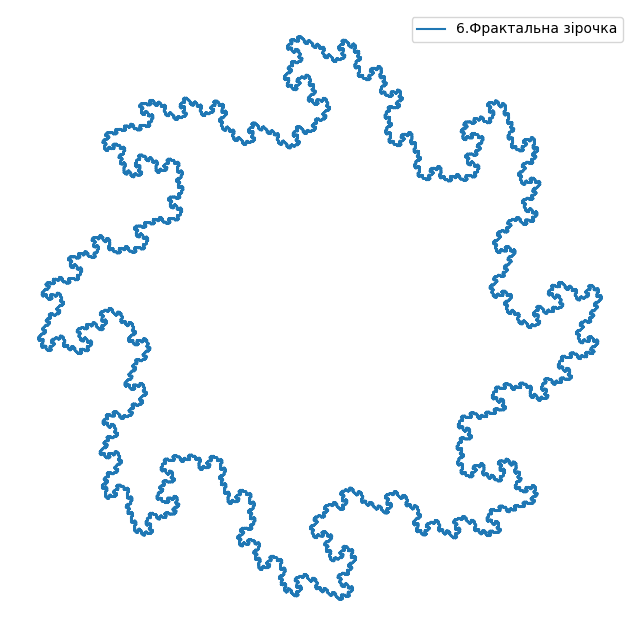

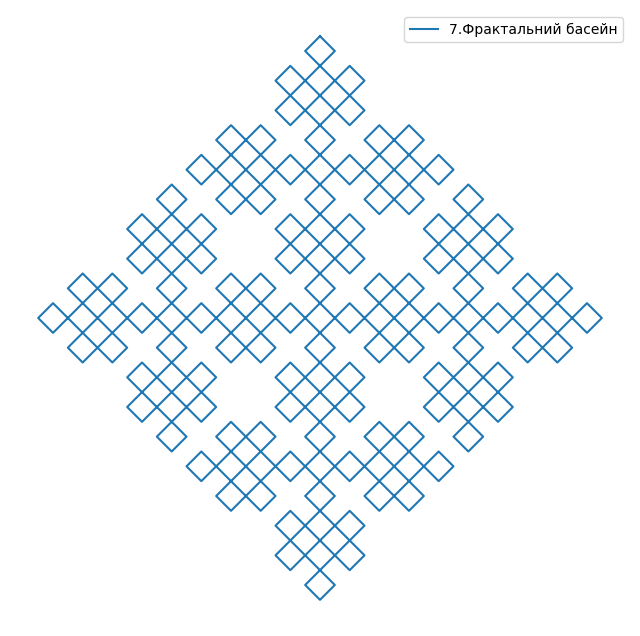

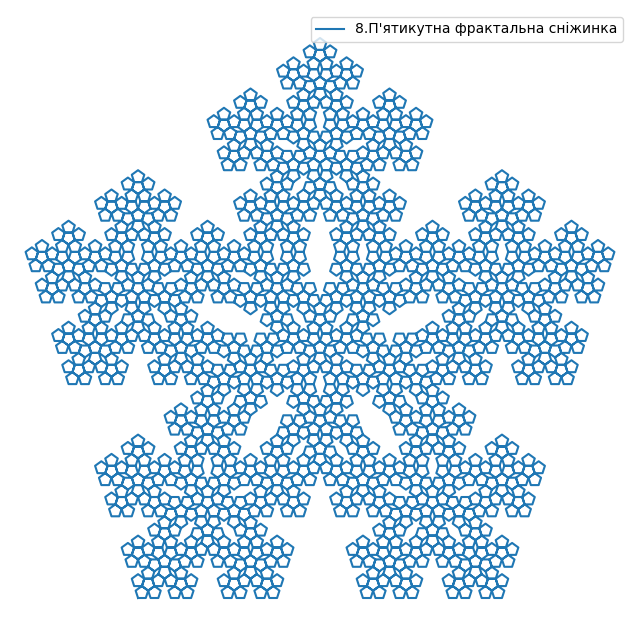

In [4]:
# Генерація та малювання фракталів
for fractal in fractals:
    commands = generate_l_system(fractal["axiom"], fractal["rules"], fractal["iterations"])
    positions = draw_l_s(commands, length=5, angle=fractal["angle"])

    x_vals, y_vals = zip(*positions)
    plt.figure(figsize=(8, 8))
    plt.plot(x_vals, y_vals, label=fractal["name"])
    plt.axis('equal')
    plt.axis('off')
    plt.legend()
    plt.show()


In [7]:
# # Приклад плавного переходу кута для першого фрактала


# # Функція для плавного переходу кута
# def animate_l_system(fractal, theta_min, theta_max, steps=100):
#     fig, ax = plt.subplots(figsize=(8, 8))
#     plt.axis('equal')
#     plt.axis('off')

#     def update(frame):
#         ax.clear()
#         theta = theta_min + (theta_max - theta_min) * frame / steps
#         commands = generate_l_system(fractal['axiom'], fractal['rules'], fractal['iterations'])
#         positions = draw_l_s(commands, length=5, angle=theta)
#         x_vals, y_vals = zip(*positions)
#         ax.plot(x_vals, y_vals, color='blue')
#         ax.set_title(f"{fractal['name']} - Angle: {theta:.2f} degrees")

#     anim = FuncAnimation(fig, update, frames=steps, interval=0.001)
#     plt.show()
    
# animate_l_system(fractals[0], theta_min=10, theta_max=80)
# animate_l_system(fractals[2], theta_min=10, theta_max=80)